### 1. This script analyses different porfolio optimization techniques in a combination with different optimization criteria, over a 3 year's period, assuming yearly portfolio rebalancing.

### 2. Displayed returns are result of optimal weights over 10 different HF strategy indices, obtained by ABC and PSO optimzation algorithms, whereas overall Fund of Funds Index (FOF_Diversified_Bench) and Equally Weighted Hedge Funds Index (EW_HF_Bench) are used as benchmarks. 

### 3. Center for International Securities and Derivatives Markets database is used as a data source.

### Optimization approaches:
#### - Artificial Bee Colony (ABC)
#### - Particle Swarm Optimization (PSO)

### Optimization criteria:
#### - Mean Semi Variance (MSV)
#### - Mean Variance (MV)
#### - conditional Value at Risk (cVaR)
#### - Maximum Absolute Drawdown (MAD)

### I. Define set of functions need to compute metrics

In [6]:
import numpy as np
import pandas as pd


def get_sharpe_ratios(df, rf, freq):
    """
    Calculates sharpe ratio for assets in df columns.
    Returns assets's Sharpe ratios.
        param: df => pd.DataFrame 
        param: rf => float
        param: freq = > integer
        
        returns: df => pd. DataFrame
    """
    rf = ((1+rf)**(1/freq))-1 
    sharpe_ratio = []
    for c in returns.columns:
        vol = returns[c].std() # volatility
        e_r = returns[c].mean() # excpected returns
        sharpe_ratio.append(round((e_r-rf)/vol, 2))
    
    return pd.DataFrame(columns=["Sharpe Ratio"], 
                        data=sharpe_ratio, 
                        index=df.columns).sort_values(by=["Sharpe Ratio"], ascending=False)

def get_df_cum_returns(df):
    """
    Calculates cumulative returns from monthly observations.
    Returns cumulative returns dataframe.
    
        param: df = > pd.DataFrame
        
        returns: df => pd. DataFrame
    """
    cum_ret = pd.DataFrame()
    
    for c in df.columns:
        cum_ret[c]=list(np.cumprod(1 + df[c].values) - 1)
    
    cum_ret.index = df.index
    
    return cum_ret

### II. Read data, calculate the main metrics

In [7]:
# Read data
returns = pd.read_csv("returns_comparison.csv")
returns['Date'] = pd.to_datetime(returns['Date'] )
returns.columns = ['Date', 'ABC_cVaR', 'PSO_cVaR', 'ABC_MV', 'PSO_MV', 'ABC_MSV','PSO_MSV', 'ABC_MAD', 'PSO_MAD',
                   'EW_HF_Bench', 'FOF_Diversified_Bench']
returns.set_index('Date',inplace=True)

In [8]:
# Cumulative return
cum_ret_summary = pd.DataFrame(round(((returns+1).cumprod()-1).iloc[-1]*100, 2))
cum_ret_summary.columns = ["3 Yr Cumulative Returns %"]
cum_ret_summary=cum_ret_summary.sort_values(by=["3 Yr Cumulative Returns %"], ascending=False)
cum_ret_summary

,3 Yr Cumulative Returns %
PSO_MSV,21.85
ABC_cVaR,21.79
PSO_MV,21.76
ABC_MV,21.65
ABC_MSV,21.25
PSO_MAD,19.80
ABC_MAD,19.65
PSO_cVaR,18.85
EW_HF_Bench,18.55
FOF_Diversified_Bench,16.47


In [9]:
# Standard deviation
std_summary = pd.DataFrame(returns.std()*100)
std_summary.columns = ["3 Yr Standard Deviation"]
std_summary = round(std_summary.sort_values(by=["3 Yr Standard Deviation"], ascending=True), 2)
std_summary

,3 Yr Standard Deviation
FOF_Diversified_Bench,1.46
PSO_cVaR,1.52
ABC_cVaR,1.56
PSO_MSV,1.57
ABC_MV,1.57
PSO_MV,1.57
ABC_MSV,1.58
ABC_MAD,1.60
PSO_MAD,1.61
EW_HF_Bench,2.30


In [10]:
# Maximum drawdown
drawdown_summary = pd.DataFrame(returns.min()*100)
drawdown_summary.columns = ["3 Yr Max Drawdown"]
drawdown_summary = round(drawdown_summary.sort_values(by=["3 Yr Max Drawdown"], ascending=False), 2)
drawdown_summary

,3 Yr Max Drawdown
ABC_cVaR,-2.57
ABC_MSV,-2.59
PSO_MSV,-2.60
ABC_MV,-2.63
PSO_MV,-2.63
PSO_cVaR,-2.65
FOF_Diversified_Bench,-2.67
ABC_MAD,-2.75
PSO_MAD,-2.76
EW_HF_Bench,-4.55


In [11]:
# Sharpe ratio   
sr = get_sharpe_ratios(returns, 0.03, 12)
sr

,Sharpe Ratio
ABC_cVaR,0.20
ABC_MV,0.20
PSO_MV,0.20
PSO_MSV,0.20
ABC_MSV,0.19
ABC_MAD,0.17
PSO_MAD,0.17
PSO_cVaR,0.16
FOF_Diversified_Bench,0.13
EW_HF_Bench,0.11


In [12]:
cum_ret_df = get_df_cum_returns(returns)

### Visualizations

<Axes: xlabel='Date'>

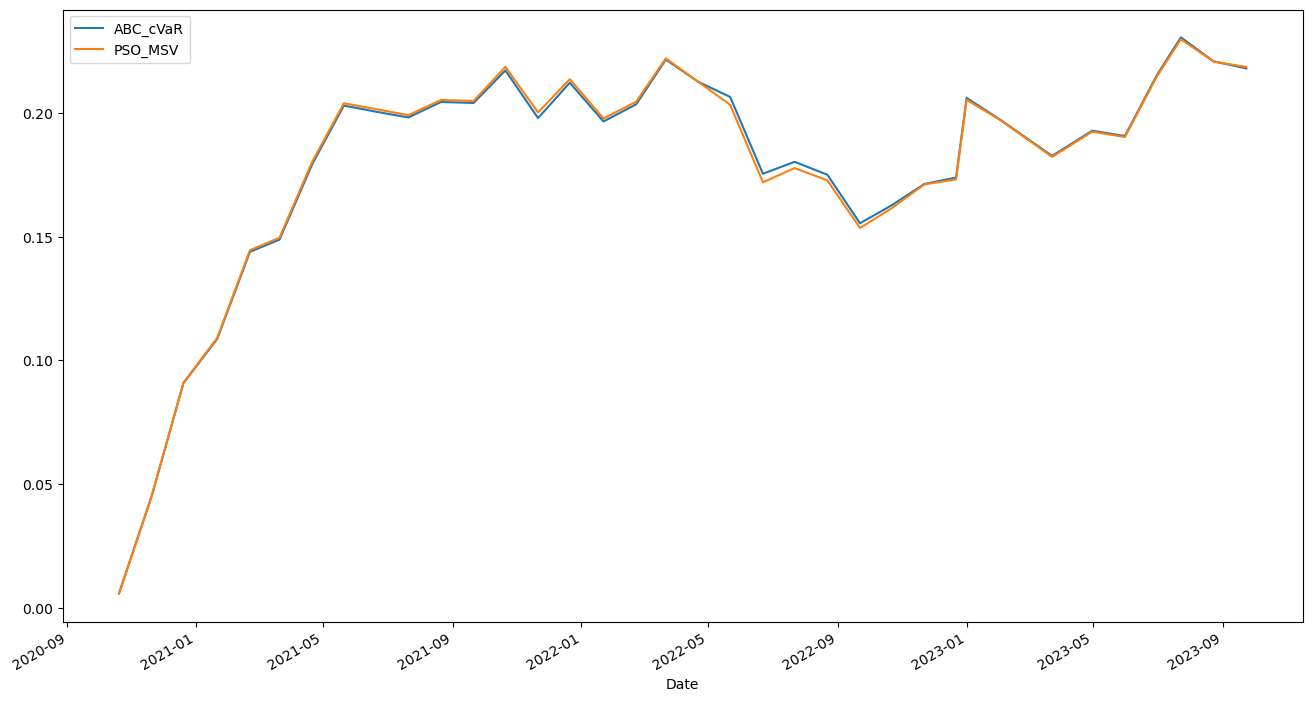

In [13]:
# Compare two best portfolios
cum_ret_df[["ABC_cVaR", "PSO_MSV"]].plot(figsize=(16, 9))

<Axes: xlabel='Date'>

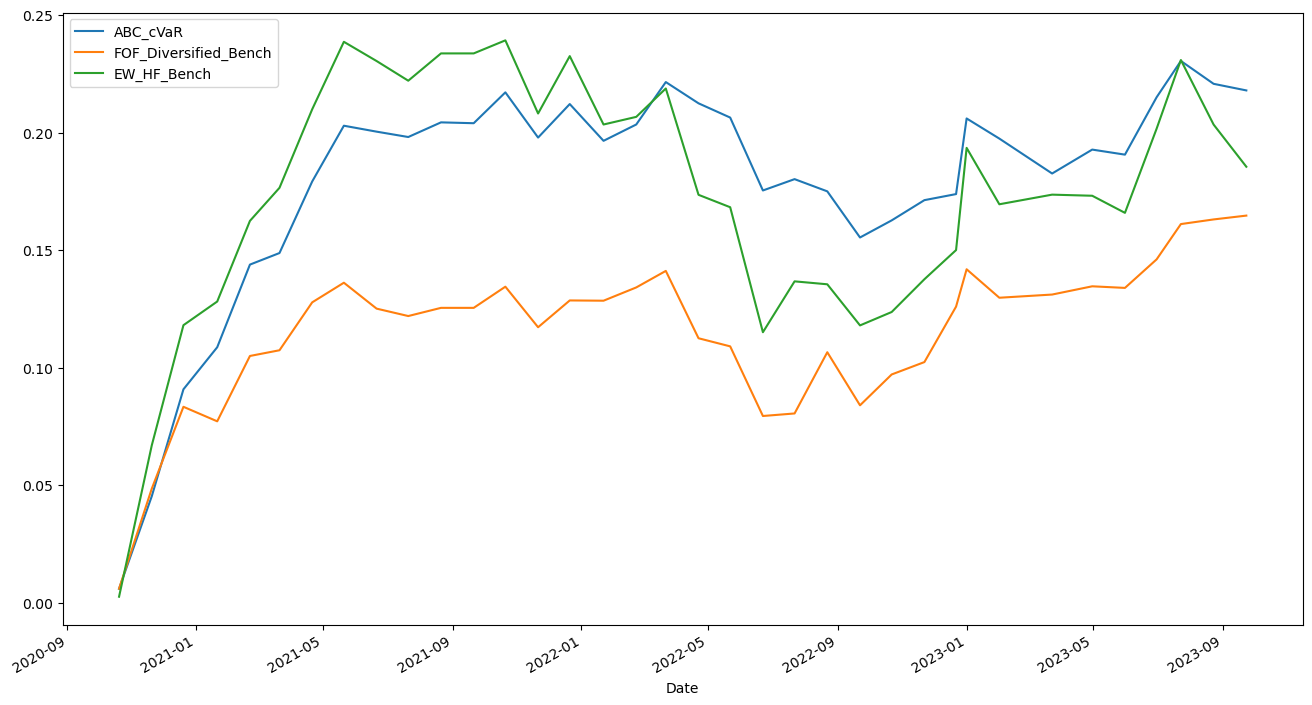

In [14]:
# Select ABC_cVaR due to better risk metrics and better performance in 2022
cum_ret_df[["ABC_cVaR", "FOF_Diversified_Bench", "EW_HF_Bench"]].plot(figsize=(16, 9))

<Axes: xlabel='Date', ylabel='Cum. Performances: Simulated Portfolios vs. EWHF and FoF Benchmarks'>

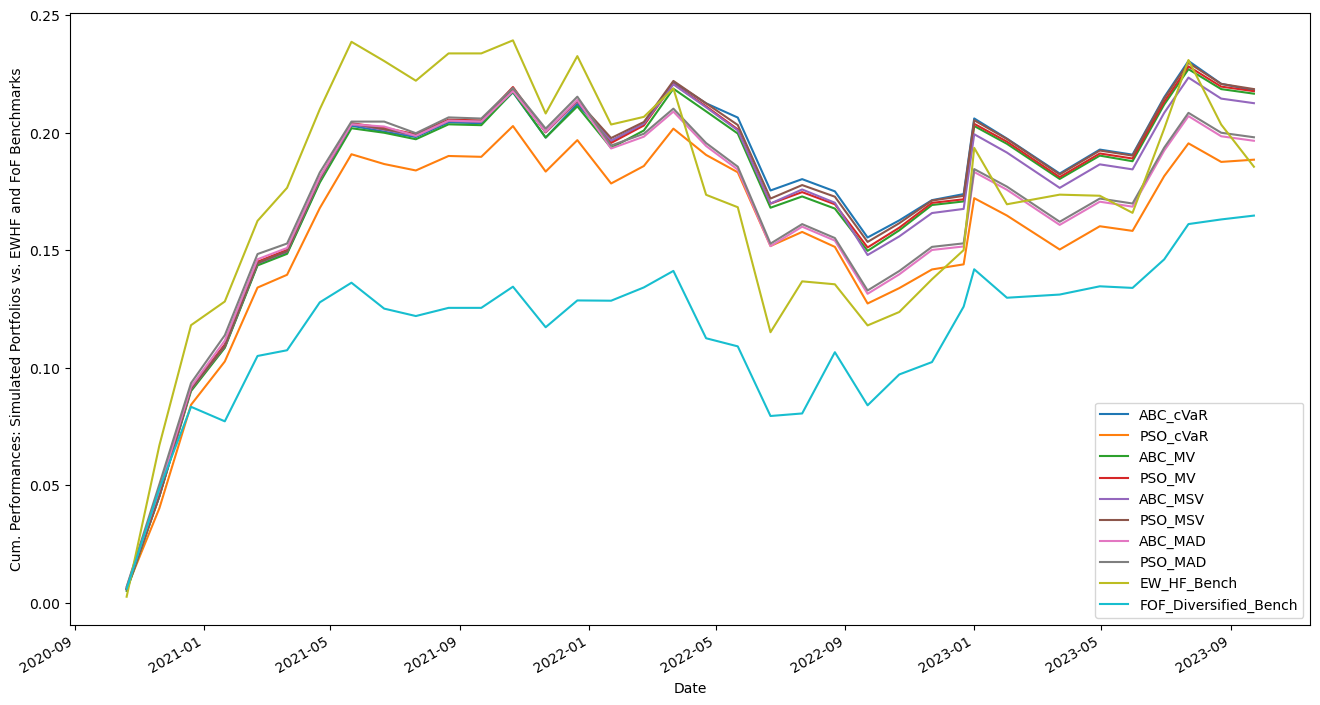

In [15]:
cum_ret_df.plot(figsize=(16, 9), ylabel='Cum. Performances: Simulated Portfolios vs. EWHF and FoF Benchmarks')